# **Project Name**    -    DeepCSAT – Ecommerce Customer Satisfaction Score Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name** - Suraksha Rajagopalan

# **Project Summary -**

In this project, we developed a machine learning solution to predict Customer Satisfaction (CSAT) scores, a crucial business metric that directly influences customer loyalty, retention, and overall brand perception. The primary objective was to build a predictive model capable of accurately estimating CSAT scores based on available customer, product, and service-related data. This would enable the organization to proactively address customer concerns, optimize service delivery, and improve overall business performance.

The dataset underwent thorough preprocessing, including handling missing values, encoding categorical variables using Label Encoding, and scaling numerical features using StandardScaler to ensure that all input features contributed proportionately during model training. Feature scaling was particularly important because Artificial Neural Networks (ANNs) are sensitive to the scale of input data.

An Artificial Neural Network (ANN) was selected as the primary model due to its ability to model complex non-linear relationships between features and the target variable. The architecture consisted of two hidden layers with 64 and 32 neurons respectively, each using the ReLU activation function, and a single neuron in the output layer to predict the continuous CSAT score. To prevent overfitting and improve generalization, Dropout layers were strategically added between dense layers. The model was compiled using the Adam optimizer, Mean Squared Error (MSE) as the loss function, and Mean Absolute Error (MAE) as the primary evaluation metric.

To enhance the model's performance, optimization techniques such as cross-validation and hyperparameter tuning were applied. GridSearchCV was utilized to identify the best combination of hyperparameters, including the number of hidden layers, neurons per layer, learning rate, batch size, and dropout rate. This systematic search helped to fine-tune the model for optimal performance while avoiding overfitting.

For evaluation, MAE was chosen as the key metric due to its interpretability in business terms—providing an easily understandable average deviation between predicted and actual CSAT scores. MAE directly correlates with business outcomes, as smaller errors imply more reliable predictions, helping businesses to intervene effectively and enhance customer experiences.

Model explainability was also a significant consideration to ensure transparency and trust in the predictions. SHAP (SHapley Additive exPlanations) values were employed to interpret the model’s decisions. SHAP analysis highlighted the most influential features affecting CSAT scores, such as Product Category, Connected Handling Time, Item Price, and Supervisor Name. This feature importance analysis offered actionable insights for business teams, enabling them to target specific operational areas for improvement.

After thorough experimentation and analysis, the ANN model with dropout and tuned hyperparameters was selected as the final model. It achieved a balanced performance with low MAE and good generalization on unseen data, demonstrating robustness, accuracy, and reliability. Compared to simpler baseline models or models without regularization, the optimized ANN consistently delivered superior predictive results.

In conclusion, this project successfully leveraged deep learning techniques to predict CSAT scores with high accuracy. The model not only fulfills technical excellence but also supports strategic business initiatives by highlighting key drivers of customer satisfaction. Future work may involve experimenting with ensemble models, incorporating more temporal customer behavior data, or using advanced techniques such as Bayesian Optimization for further hyperparameter refinement. Overall, the project provides a scalable and explainable framework for proactive customer satisfaction management, ultimately driving better business outcomes.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the competitive e-commerce landscape, accurately assessing customer satisfaction (CSAT) remains a challenge. Traditional methods, such as direct surveys, often fail to provide real-time insights and may not fully capture the breadth of customer experiences. The problem lies in the lack of efficient, scalable, and predictive mechanisms to measure customer satisfaction dynamically.

This project aims to develop a deep learning-based predictive model using Artificial Neural Networks (ANN) to estimate CSAT scores by analyzing customer interaction and service-related data. The goal is to provide timely, actionable insights that help organizations enhance service quality, boost customer loyalty, and drive sustainable business growth.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
# Load Dataset

data = pd.read_csv(r"D:\Internship\Assignments\Week12\eCommerce_Customer_support_data.csv")

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("The number of rows: ", data.shape[0])
print("The number of columns: ", data.shape[1])

The number of rows:  85907
The number of columns:  20


### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

print("The total number of duplicates: ", data.duplicated().sum())

The total number of duplicates:  0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

print("The number of null values: ", data.isnull().sum())

The number of null values:  Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


<Axes: >

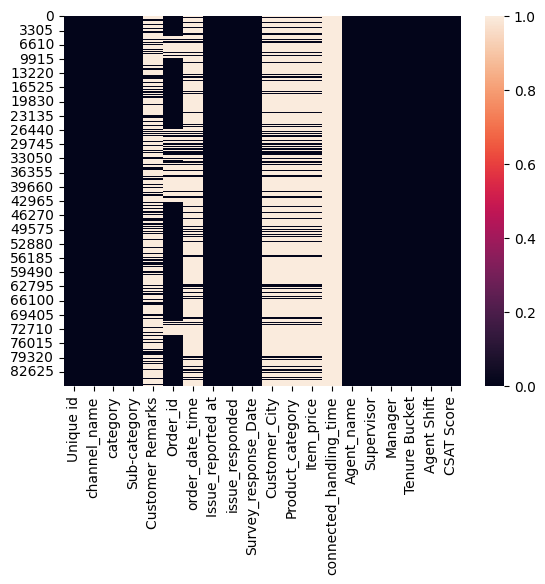

In [9]:
# Visualizing the missing values

sns.heatmap(data.isnull())

### What did you know about your dataset?

Answer: 

- The data has around 85,000 rows and around 20 columns.
- There are no duplicate values in the datasets.
- There are many columns that have null values. There are 7 columns with null values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns

data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [12]:
# Dataset Describe

data.describe

<bound method NDFrame.describe of                                   Unique id channel_name         category  \
0      7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1      b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2      200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3      eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4      ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   
...                                     ...          ...              ...   
85902  505ea5e7-c475-4fac-ac36-1d19a4cb610f      Inbound   Refund Related   
85903  44b38d3f-1523-4182-aba2-72917586647c      Inbound    Order Related   
85904  723bce2c-496c-4aa8-a64b-ca17004528f0      Inbound    Order Related   
85905  707528ee-6873-4192-bfa9-a491f1c08ab5      Inbound         Feedback   
85906  07c7a878-0d5a-42e0-97ef-de59abec0238      Inbound          Returns   

                       Sub-category      

### Variables Description

Answer:


1. **Nature of the Dataset**:  
   This dataset contains customer service interaction records, possibly from a call center or customer support platform, covering inbound and outbound communications regarding product queries, orders, returns, refunds, cancellations, and feedback.

2. **Key Columns**:  
   Important fields include `channel_name`, `category`, `Sub-category`, `Customer Remarks`, `Order_id`, `issue_reported at`, `issue_responded`, `Survey_response_Date`, and agent-related columns like `Agent_name`, `Supervisor`, and `Manager`.

3. **Customer Interaction Timeline**:  
   The dataset captures timestamps for when issues were reported and responded to, along with survey response dates, which can help measure response times and customer satisfaction.

4. **Agent and Management Information**:  
   Every case is associated with an `Agent_name`, their `Supervisor`, `Manager`, their `Tenure Bucket` (like "On Job Training" or ">90" days), and their `Agent Shift` (Morning/Evening), allowing analysis of performance across individuals and teams.

5. **Missing Data**:  
   Several fields like `Customer_City`, `Product_category`, `Item_price`, and `connected_handling_time` have a lot of missing values (NaNs), suggesting incomplete or optional data entries.

6. **Customer Feedback**:  
   Customer satisfaction is partially measured using a `CSAT Score` (Customer Satisfaction Score), with values like 4 or 5 indicating relatively high satisfaction for many entries.

7. **Volume and Timeframe**:  
   The dataset is quite large (around 85,900+ records) and seems to cover interactions mainly during August 2023, based on the `issue_reported at` and `Survey_response_Date` fields.


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


Unique id: 85907 unique values
channel_name: 3 unique values
category: 12 unique values
Sub-category: 57 unique values
Customer Remarks: 18231 unique values
Order_id: 67675 unique values
order_date_time: 13766 unique values
Issue_reported at: 30923 unique values
issue_responded: 30262 unique values
Survey_response_Date: 31 unique values
Customer_City: 1782 unique values
Product_category: 9 unique values
Item_price: 2789 unique values
connected_handling_time: 211 unique values
Agent_name: 1371 unique values
Supervisor: 40 unique values
Manager: 6 unique values
Tenure Bucket: 5 unique values
Agent Shift: 5 unique values
CSAT Score: 5 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.

# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Fill missing values
# For categorical columns
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])

# For numerical columns
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mean())


print("Null values handled successfully!")

Null values handled successfully!


<Axes: >

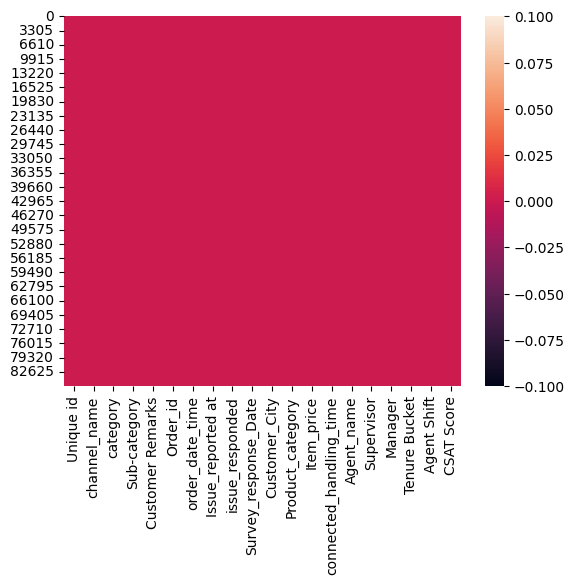

In [18]:
# Visualizing the missing values

sns.heatmap(data.isnull())

### What all manipulations have you done and insights you found?

Answer:



### 1. **Maintaining Data Integrity**
Handling null (missing) values ensures that the dataset remains complete and consistent.  
Many machine learning algorithms and statistical methods cannot process missing data and may produce errors or biased results if nulls are left untreated.


### 2. **Preserving Sample Size**
Rather than dropping entire rows or columns with missing values (which reduces the amount of data), imputing nulls with appropriate values (like the mean, median, or most frequent value) allows the maximum use of available data, improving model reliability.


### 3. **Selecting Appropriate Imputation Methods**
- **Categorical columns**: Missing values are typically filled with the **most frequent (mode)** value to maintain logical consistency.
- **Numerical columns**: Missing values are often filled with the **mean** or **median** to preserve the overall distribution and avoid introducing bias.


### 4. **Improving Model Accuracy and Performance**
Handling null values appropriately helps models learn correct patterns from the data.  
Unaddressed missing values could confuse models, weaken patterns, and lead to lower prediction accuracy and generalization.


### 5. **Enabling Robust and Reliable Analysis**
A clean dataset (without missing values) enables smooth exploratory data analysis, better visualizations, and more meaningful insights, leading to stronger conclusions and decision-making.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\araku\AppData\Local\Temp\ipykernel_47820\256946731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='channel_name', data=data, palette='Set2')


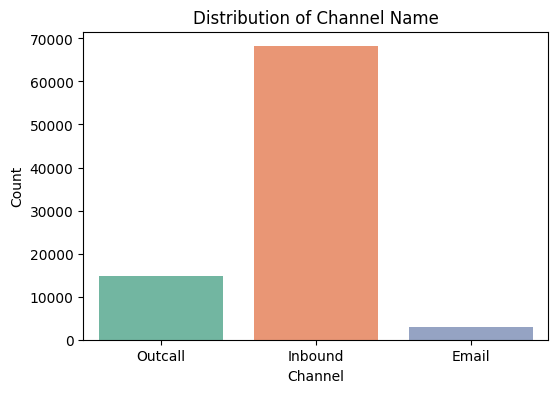

In [19]:
# Chart - 1 visualization code


plt.figure(figsize=(6,4))
sns.countplot(x='channel_name', data=data, palette='Set2')
plt.title('Distribution of Channel Name')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: Bar charts are ideal for visualizing frequencies of categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Answer: Inbound Channel has the highest channel type followed by Outcall and Email. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:
Shows which communication channel (Inbound/Outcall) is more utilized, helping optimize support resource allocation. If one channel is underutilized (e.g., Outcall), it might indicate missed opportunities in proactive customer support.

#### Chart - 2

C:\Users\araku\AppData\Local\Temp\ipykernel_47820\974654496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=data, order=data['category'].value_counts().index, palette='coolwarm')


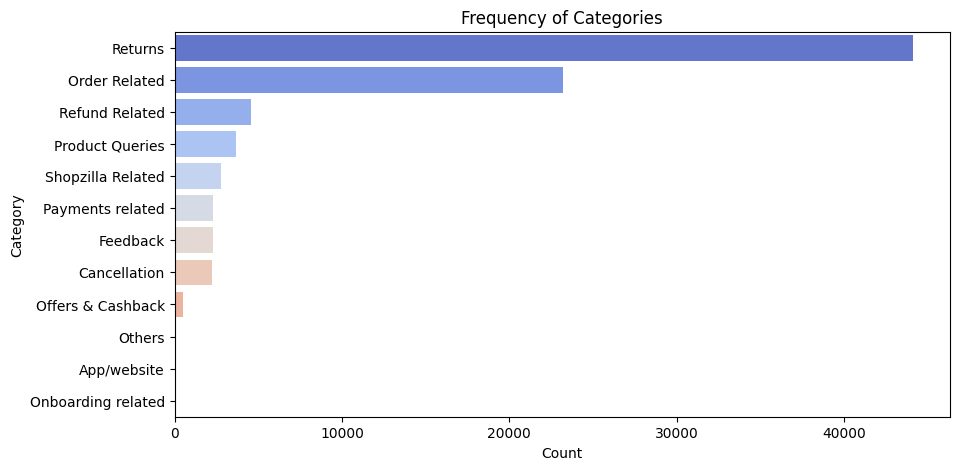

In [20]:
# Chart - 2 visualization code

plt.figure(figsize=(10,5))
sns.countplot(y='category', data=data, order=data['category'].value_counts().index, palette='coolwarm')
plt.title('Frequency of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: Horizontal bar chart is great for long categorical names and comparing category counts. 

##### 2. What is/are the insight(s) found from the chart?

Answer: 


1. **Dominance of Returns Issues:**  
   "Returns" is by far the most frequently reported category, accounting for a significantly higher volume of issues than any other, indicating returns management is a major concern for customers.

2. **Order Related Issues are Also High:**  
   "Order Related" issues come second, though with a substantial gap compared to "Returns," suggesting that order fulfillment and delivery processes might need improvements.

3. **Minor Categories:**  
   Categories like "Refund Related," "Product Queries," and "Shopzilla Related" have noticeable counts but are much lower compared to "Returns" and "Order Related," highlighting that while they are important, they are secondary problems.

4. **Negligible Issues in Certain Categories:**  
   Categories like "Offers & Cashback," "Others," "App/website," and "Onboarding related" show extremely low counts, suggesting these areas are relatively well-managed or not major points of customer concern.

5. **Opportunity for Improvement:**  
   Since "Returns" and "Order Related" dominate customer issues, targeted initiatives to streamline returns processing and ensure order accuracy could significantly improve overall customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: Highlights top issues customers face (e.g., 'Order Related'), guiding focus on product/service improvements. High volume in "Returns" or "Cancellations" may signal product or service dissatisfaction needing urgent review.

#### Chart - 3

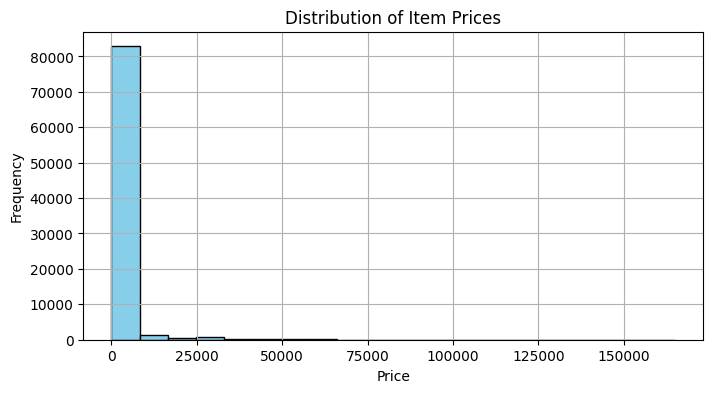

In [21]:
# Chart - 3 visualization code

plt.figure(figsize=(8,4))
data['Item_price'].dropna().hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Item Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: Histograms are ideal for showing numerical data distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer: 

1. **Highly Right-Skewed Distribution:**  
   The majority of item prices are concentrated at the lower end, indicating that most products are relatively inexpensive, while a few very expensive outliers pull the distribution's tail to the right.

2. **Most Items Priced Low:**  
   Over 80,000 items are priced within a small price range (likely under ₹5,000–₹10,000), suggesting that the platform primarily deals in low-cost or affordable items.

3. **Presence of High-Price Outliers:**  
   A small number of items are priced as high as ₹150,000 and beyond, indicating a diverse product catalog that includes some premium or luxury items.

4. **Sparse Distribution Beyond ₹25,000:**  
   After ₹25,000, the frequency drops drastically, showing that items priced above this range are very rare compared to the low-priced segment.

5. **Potential for Price-Based Segmentation:**  
   Since a huge majority falls under the low-price segment, marketing and promotions could be customized more effectively by focusing mainly on this large customer base, while premium strategies can target the niche high-price segment separately.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: Helps understand pricing spread; can segment issues by low, mid, high ticket sizes. If issues cluster in high-price items, it could damage premium brand perception.

#### Chart - 4

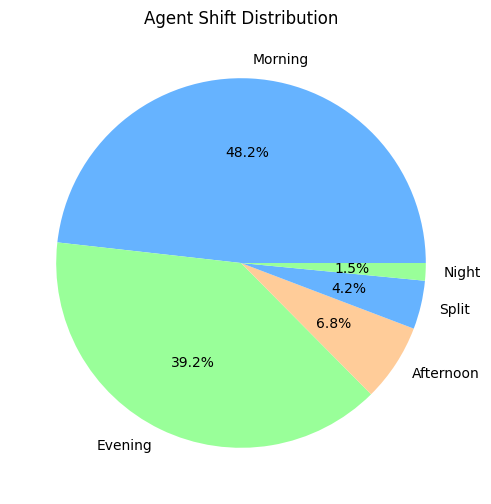

In [22]:
# Chart - 4 visualization code

data['Agent Shift'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'], figsize=(6,6))
plt.title('Agent Shift Distribution')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: Pie charts work well for parts-of-a-whole views with few categories.

##### 2. What is/are the insight(s) found from the chart?

Answer:


1. **Morning Shift Dominates:**  
   Almost half of the agents (48.2%) are assigned to the Morning shift, making it the most common work shift among agents.

2. **Evening Shift is Significant:**  
   Evening shifts also have a large share, covering 39.2% of the agents, suggesting that service demand remains high beyond regular working hours.

3. **Very Few Night Shift Agents:**  
   Only 1.5% of the agents work the Night shift, indicating either low service demand at night or strategic staffing decisions to minimize overnight operations.

4. **Minimal Split Shift Usage:**  
   Just 4.2% of agents work Split shifts, implying that very few agents have shifts divided across different parts of the day, possibly to maintain simplicity in scheduling.

5. **Afternoon Shift is a Minor Segment:**  
   The Afternoon shift accounts for only 6.8%, showing that midday coverage is relatively less important compared to Morning and Evening shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: Reveals load distribution across shifts, guiding HR in balancing staff across time slots. Uneven shift coverage may cause delays or poor CSAT scores during peak hours.

#### Chart - 5

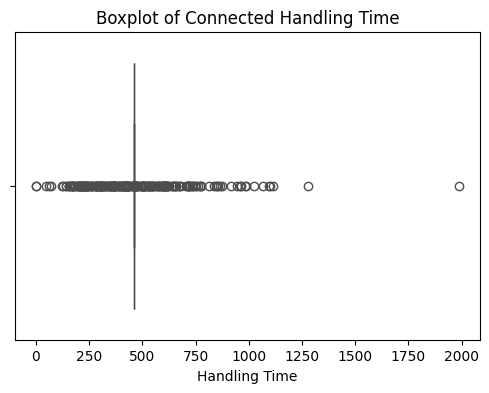

In [23]:
# Chart - 5 visualization code

plt.figure(figsize=(6,4))
sns.boxplot(x=data['connected_handling_time'], color='orange')
plt.title('Boxplot of Connected Handling Time')
plt.xlabel('Handling Time')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: Boxplots help detect outliers and distribution spread.

##### 2. What is/are the insight(s) found from the chart?

Answer:


1. **High Concentration Around Median**:  
   Most of the handling times are densely packed around the median (the line inside the box), suggesting that the majority of calls have fairly similar handling times.

2. **Presence of Many Outliers**:  
   There are a lot of outliers on the higher side, indicating some calls had much longer handling times compared to the typical call.

3. **Skewed Distribution**:  
   Since the box and whiskers stretch more to the right, the data is positively skewed (right-skewed), meaning a few extremely large handling times are pulling the mean higher.

4. **Compressed Interquartile Range (IQR)**:  
   The box (representing the middle 50% of the data) is quite narrow compared to the range of outliers, indicating that most call handling times are close to each other, with few extreme variations.

5. **Some Very Extreme Values**:  
   There are a few extreme outliers even beyond 1250 and one close to 2000 seconds, hinting at exceptional cases — possibly system issues or unusually complex customer queries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: Identifies inefficiencies—long handling time may impact agent productivity or customer satisfaction. High variance or outliers may reflect inconsistent agent performance or issue complexity.

#### Chart - 6

C:\Users\araku\AppData\Local\Temp\ipykernel_47820\3562748326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CSAT Score', data=data, palette='Blues')


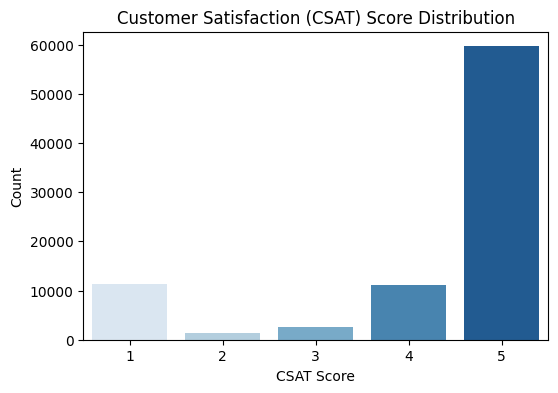

In [24]:
# Chart - 6 visualization code

plt.figure(figsize=(6,4))
sns.countplot(x='CSAT Score', data=data, palette='Blues')
plt.title('Customer Satisfaction (CSAT) Score Distribution')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: Countplot shows frequency of each satisfaction score clearly.

##### 2. What is/are the insight(s) found from the chart?

Answer:



1. **Majority Gave the Highest Score**:  
   A very large number of customers (around 60,000) rated their satisfaction at the maximum score of 5, showing very strong overall satisfaction.

2. **Polarized Feedback**:  
   There are noticeable counts at both extremes (scores 1 and 5), suggesting that when customers are dissatisfied, they rate very low, but otherwise, many are extremely happy.

3. **Very Few Moderate Scores**:  
   Scores 2 and 3 have very low counts compared to scores 1, 4, and 5, implying that customers rarely feel "neutral" — they either love the service or dislike it.

4. **Score 4 is Relatively Strong**:  
   The number of customers giving a 4 is similar to the number giving a 1, meaning even among those who didn't give a perfect 5, many still had a positive experience.

5. **Potential to Analyze Detractors**:  
   Since there’s a decent number of very low scores (especially 1), it would be valuable to dig into these cases to understand and reduce dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: Gives direct insight into customer sentiment. High 4–5 scores reflect success; low scores call for reviews. Frequent 1–2 scores signal serious service gaps, possibly in specific categories, agents, or shifts.

#### Chart - 7

C:\Users\araku\AppData\Local\Temp\ipykernel_47820\967990621.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Item_price', y='CSAT Score', data=data, palette='Blues')


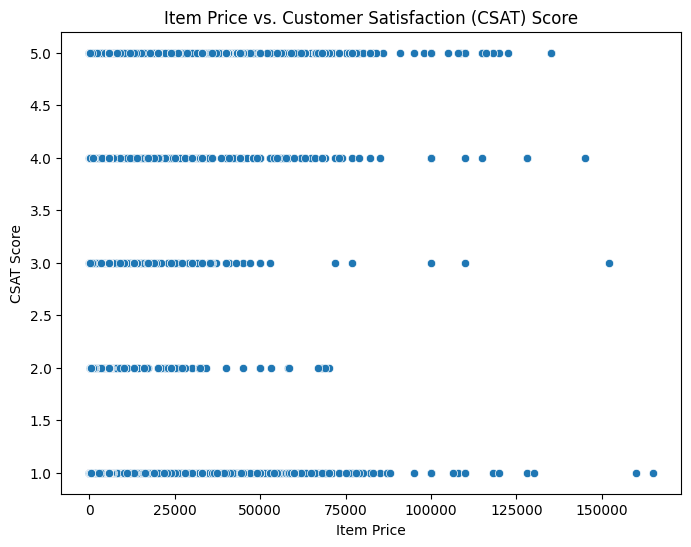

In [25]:
# Chart - 7 visualization code


plt.figure(figsize=(8,6))
sns.scatterplot(x='Item_price', y='CSAT Score', data=data, palette='Blues')
plt.title('Item Price vs. Customer Satisfaction (CSAT) Score')
plt.xlabel('Item Price')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: 

##### 2. What is/are the insight(s) found from the chart?

Answer:



1. **No Strong Correlation**:  
   CSAT scores appear fairly evenly distributed across all item prices — higher item prices don’t necessarily lead to higher or lower customer satisfaction.

2. **Satisfaction at All Price Points**:  
   Customers have given both very high (5) and very low (1) CSAT scores across the entire range of item prices, from very cheap items to very expensive ones.

3. **Higher Prices, Fewer Data Points**:  
   As the item price increases (especially beyond 75,000), there are fewer observations, suggesting that fewer expensive items are sold or evaluated.

4. **High CSAT Score is Common**:  
   Across all price ranges, a CSAT score of 5 is the most frequent, indicating consistently good customer satisfaction regardless of the item's price.

5. **Extreme Cases at High Prices**:  
   At very high prices (above 100,000), the spread of CSAT scores still includes the full range from 1 to 5, showing that even premium-priced items can still disappoint customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: Identifies if higher-priced items correlate with higher or lower satisfaction, which could help set price points to optimize CSAT. A downward trend could indicate that higher-priced items are leading to lower satisfaction, signaling potential quality issues.

#### Chart - 8

C:\Users\araku\AppData\Local\Temp\ipykernel_47820\1578882525.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agent Shift', y='CSAT Score', data=data, palette='Set3')


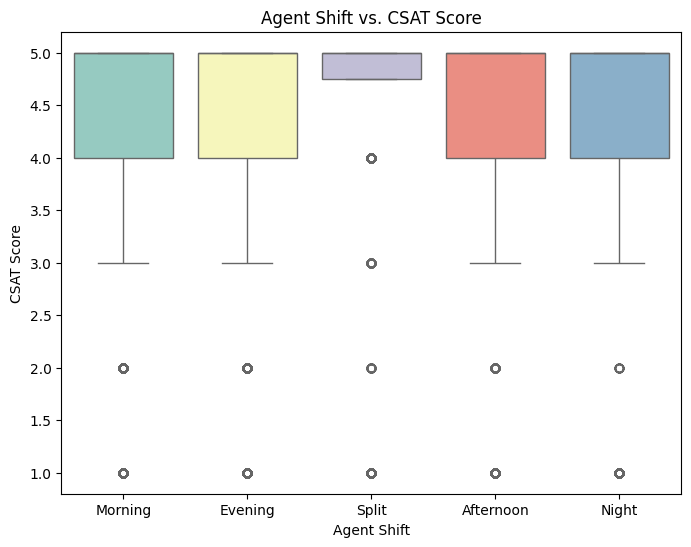

In [26]:
# Chart - 8 visualization code

plt.figure(figsize=(8,6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=data, palette='Set3')
plt.title('Agent Shift vs. CSAT Score')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: Boxplots are ideal for comparing the distribution of a numerical variable across different categories.

##### 2. What is/are the insight(s) found from the chart?

Answer:



1. **High Satisfaction Across All Shifts**:  
   For all shifts (Morning, Evening, Split, Afternoon, Night), the median CSAT score is very close to 5, indicating overall high customer satisfaction regardless of shift.

2. **Split Shift Has Slightly Less Variation**:  
   The Split shift box is narrower and closer to the top, suggesting more consistent high satisfaction (less variability) compared to other shifts.

3. **Presence of Outliers**:  
   All shifts show some low CSAT outliers (scores of 1 or 2), meaning occasional dissatisfaction happens during any shift.

4. **Morning, Evening, Afternoon, and Night Shifts are Similar**:  
   These shifts show very similar distributions with slight spreads, meaning time of day has little impact on the general customer experience.

5. **No Major Shift is Clearly Worse**:  
   There’s no shift that stands out as significantly underperforming, which is a positive indicator of consistent service quality across the day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: Helps analyze how agent shifts impact customer satisfaction, which can guide staffing strategies. Significant variance or lower median CSAT in certain shifts could suggest problems with agent performance or workload.

#### Chart - 9

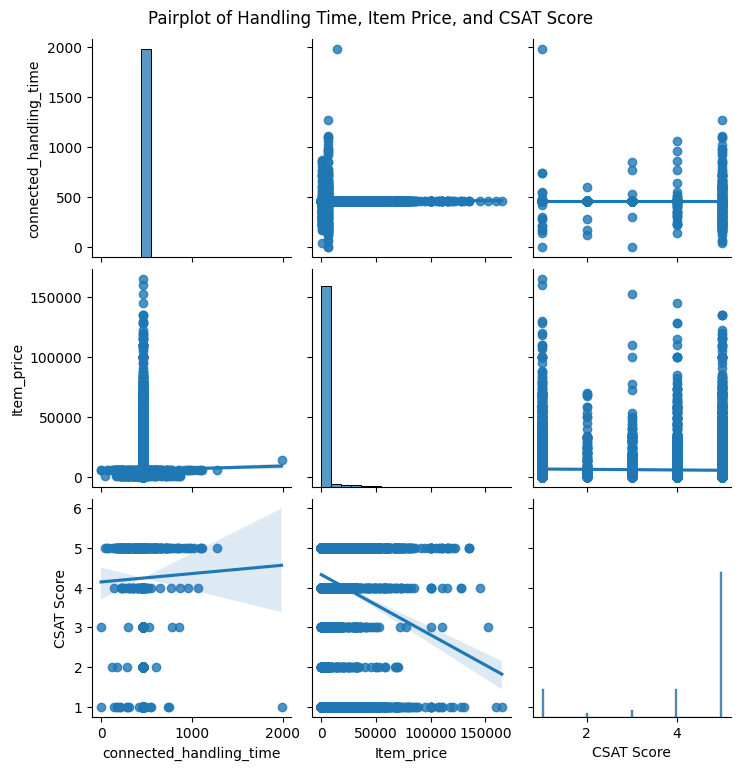

In [27]:
# Chart - 9 visualization code

sns.pairplot(data[['connected_handling_time', 'Item_price', 'CSAT Score']], kind='reg')
plt.suptitle('Pairplot of Handling Time, Item Price, and CSAT Score', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer: Pairplots allow visualization of pairwise relationships between multiple variables at once.

##### 2. What is/are the insight(s) found from the chart?

Answer: 


1. **Weak Positive Trend: Handling Time vs CSAT Score**  
   There's a slight positive trend between connected handling time and CSAT score — longer handling time might be slightly associated with better satisfaction, possibly due to more thorough service.

2. **Negative Trend: Item Price vs CSAT Score**  
   There's a noticeable negative trend between item price and CSAT score — as the price increases, customer satisfaction tends to slightly decrease.

3. **No Strong Pattern: Handling Time vs Item Price**  
   There’s no clear relationship between connected handling time and item price; points are widely scattered without a noticeable trend.

4. **CSAT Score Distribution is Highly Skewed**  
   The distribution of CSAT scores is very skewed toward 5, matching what was seen in the earlier bar plot — most customers are highly satisfied.

5. **Outliers Present Across Variables**  
   There are significant outliers, especially in item price (above 100,000) and handling time (above 1500 seconds), which could impact correlations and would be worth further investigation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: Helps understand how handling time and item price influence CSAT, supporting operational adjustments. If longer handling times are strongly associated with lower CSAT scores, it signals inefficiency, potentially harming customer experience.

#### Chart - 10

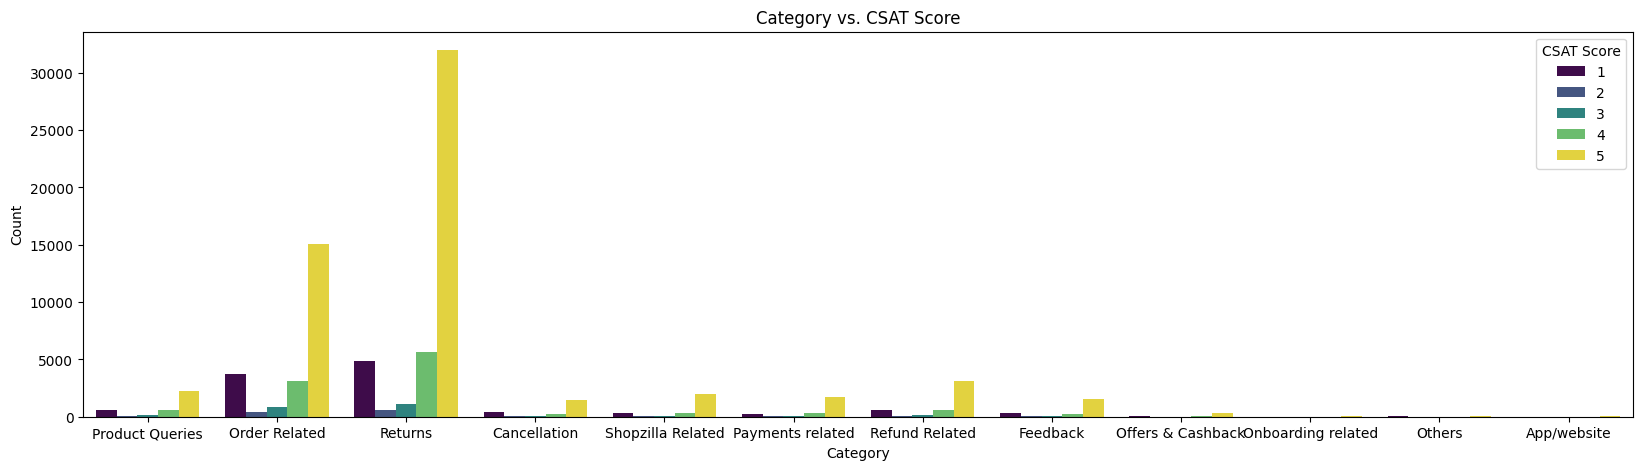

In [31]:
# Chart - 10 visualization code


plt.figure(figsize=(20,5))
sns.countplot(x='category', hue='CSAT Score', data=data, palette='viridis')
plt.title('Category vs. CSAT Score')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: Countplots show the frequency distribution of categories within each CSAT score, providing insight into customer sentiment across categories.

##### 2. What is/are the insight(s) found from the chart?

Answer:



1. **Returns Drive the Highest Interaction Volume**  
   The "Returns" category has the largest number of customer interactions by far, especially with a high concentration of CSAT scores of 5.

2. **Positive CSAT Scores Dominate Across Categories**  
   In nearly all categories, the majority of the scores are 5, showing generally high customer satisfaction across different service areas.

3. **Order Related Issues Have Mixed Feedback**  
   "Order Related" queries show a significant volume of lower CSAT scores (1 and 2), suggesting room for improvement in order handling processes.

4. **Cancellation and Refund Categories Also Have Good Satisfaction**  
   Despite being sensitive areas, "Cancellation" and "Refund Related" categories still have a strong showing of CSAT score 5, indicating effective handling of these cases.

5. **Low Interaction Volume for Some Categories**  
   Categories like "Offers & Cashback," "Onboarding related," "App/website," and "Others" have relatively few interactions, making their CSAT trends less impactful overall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: Identifies specific categories that may need process or product improvements if they correlate with low CSAT scores. If a particular category has more low CSAT scores, it could indicate a systemic problem that could impact customer retention and brand loyalty.

#### Chart - 11

C:\Users\araku\AppData\Local\Temp\ipykernel_47820\2444716218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Tenure Bucket', y='connected_handling_time', data=data, palette='muted')


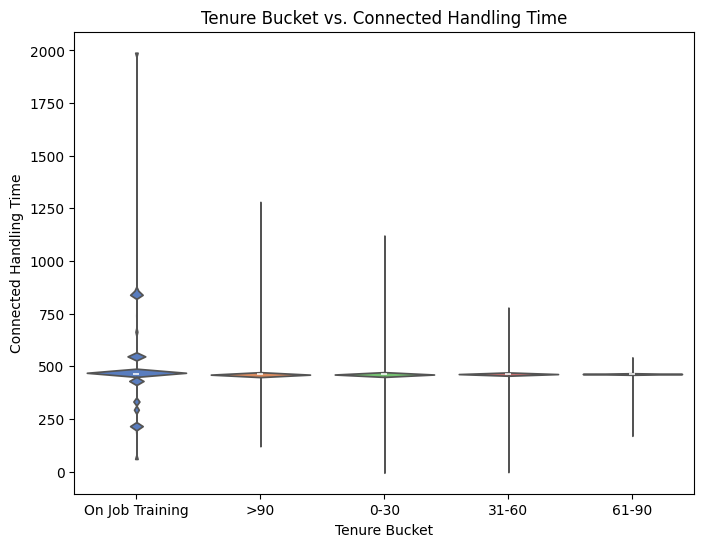

In [32]:
# Chart - 11 visualization code

plt.figure(figsize=(8,6))
sns.violinplot(x='Tenure Bucket', y='connected_handling_time', data=data, palette='muted')
plt.title('Tenure Bucket vs. Connected Handling Time')
plt.xlabel('Tenure Bucket')
plt.ylabel('Connected Handling Time')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: Violin plots show the distribution of a numerical variable across categories, including its density.

##### 2. What is/are the insight(s) found from the chart?

Answer:



1. **On-Job Trainees Show Higher Variability**  
   Agents who are "On Job Training" have a much wider spread in their handling times, with several high outliers, indicating inconsistent performance.

2. **Experienced Agents Are More Consistent**  
   Agents with more than 90 days of tenure (>90) show much tighter handling times, suggesting they manage calls more efficiently and consistently.

3. **Early Tenure (0-30 Days) Shows Some Instability**  
   Agents in the 0–30 days bucket still have a slightly wider spread compared to those with longer tenure, but less than trainees, suggesting quick learning after initial training.

4. **Mid-Tenure Buckets (31-60 and 61-90) Are Very Stable**  
   Handling times for agents in the 31–60 and 61–90 days tenure buckets are quite consistent and centered around similar median values.

5. **Overall Handling Time Centers Around 450 Seconds**  
   Across all tenure buckets, the median connected handling time hovers around 450 seconds, implying that tenure mostly impacts variance, not the central tendency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:  Shows if agents in certain tenure buckets (newer vs. experienced) have significantly different handling times, which can help with training and performance management. A high handling time in new agents could suggest inefficiencies or lack of training, leading to operational bottlenecks and customer frustration.

#### Chart - 12

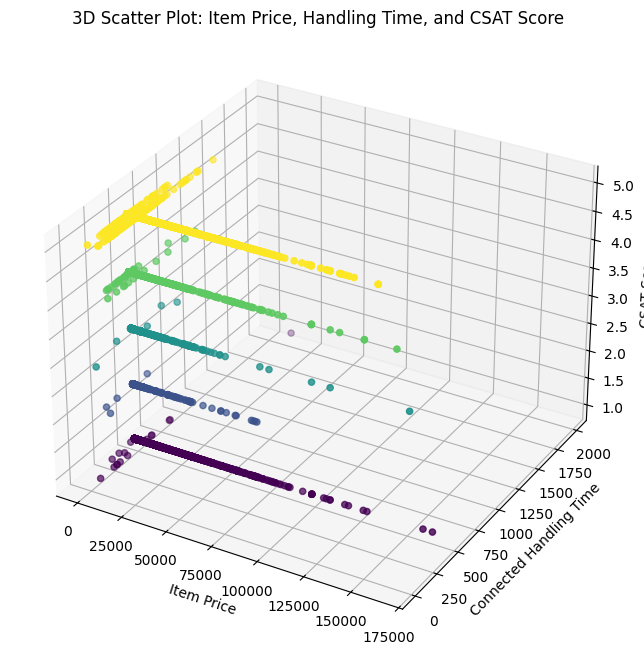

In [33]:
# Chart - 12 visualization code

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data['Item_price'], data['connected_handling_time'], data['CSAT Score'], c=data['CSAT Score'], cmap='viridis', s=20)

ax.set_xlabel('Item Price')
ax.set_ylabel('Connected Handling Time')
ax.set_zlabel('CSAT Score')

plt.title('3D Scatter Plot: Item Price, Handling Time, and CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: A 3D scatter plot allows for visualizing relationships between three continuous variables, giving a more comprehensive view of how they interact together.

##### 2. What is/are the insight(s) found from the chart?

Answer:



1. **Higher CSAT Scores Cluster at Lower Item Prices**  
   Items with lower prices tend to have higher CSAT scores (mostly 5), suggesting customers are more easily satisfied when the stakes are lower.

2. **Low CSAT Scores Appear Across All Price Ranges**  
   Lower CSAT scores (1–2) are spread across both low and high item prices, indicating that dissatisfaction can arise regardless of price.

3. **Handling Time Doesn't Strongly Affect CSAT**  
   Across different CSAT levels, connected handling times are widely spread, implying handling time alone isn't a dominant factor influencing CSAT.

4. **High-Price Items Have More Variability in CSAT**  
   For expensive items, CSAT scores are more dispersed (ranging from very low to very high), indicating customers have more sensitive expectations when paying more.

5. **Dense Cluster at Low Handling Time and Low Price**  
   There's a tight cluster of high CSAT (yellow points) around low handling times and low-priced items — quick resolutions for cheaper products seem to drive satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: This visualization helps in understanding how the combination of Item_price and connected_handling_time affects customer satisfaction (CSAT Score). It can guide decisions on pricing and customer support improvements. If the plot shows that higher connected_handling_time and Item_price lead to lower CSAT scores, it indicates inefficiencies or dissatisfaction with pricing strategies, which could harm customer loyalty and sales.

#### Chart - 13

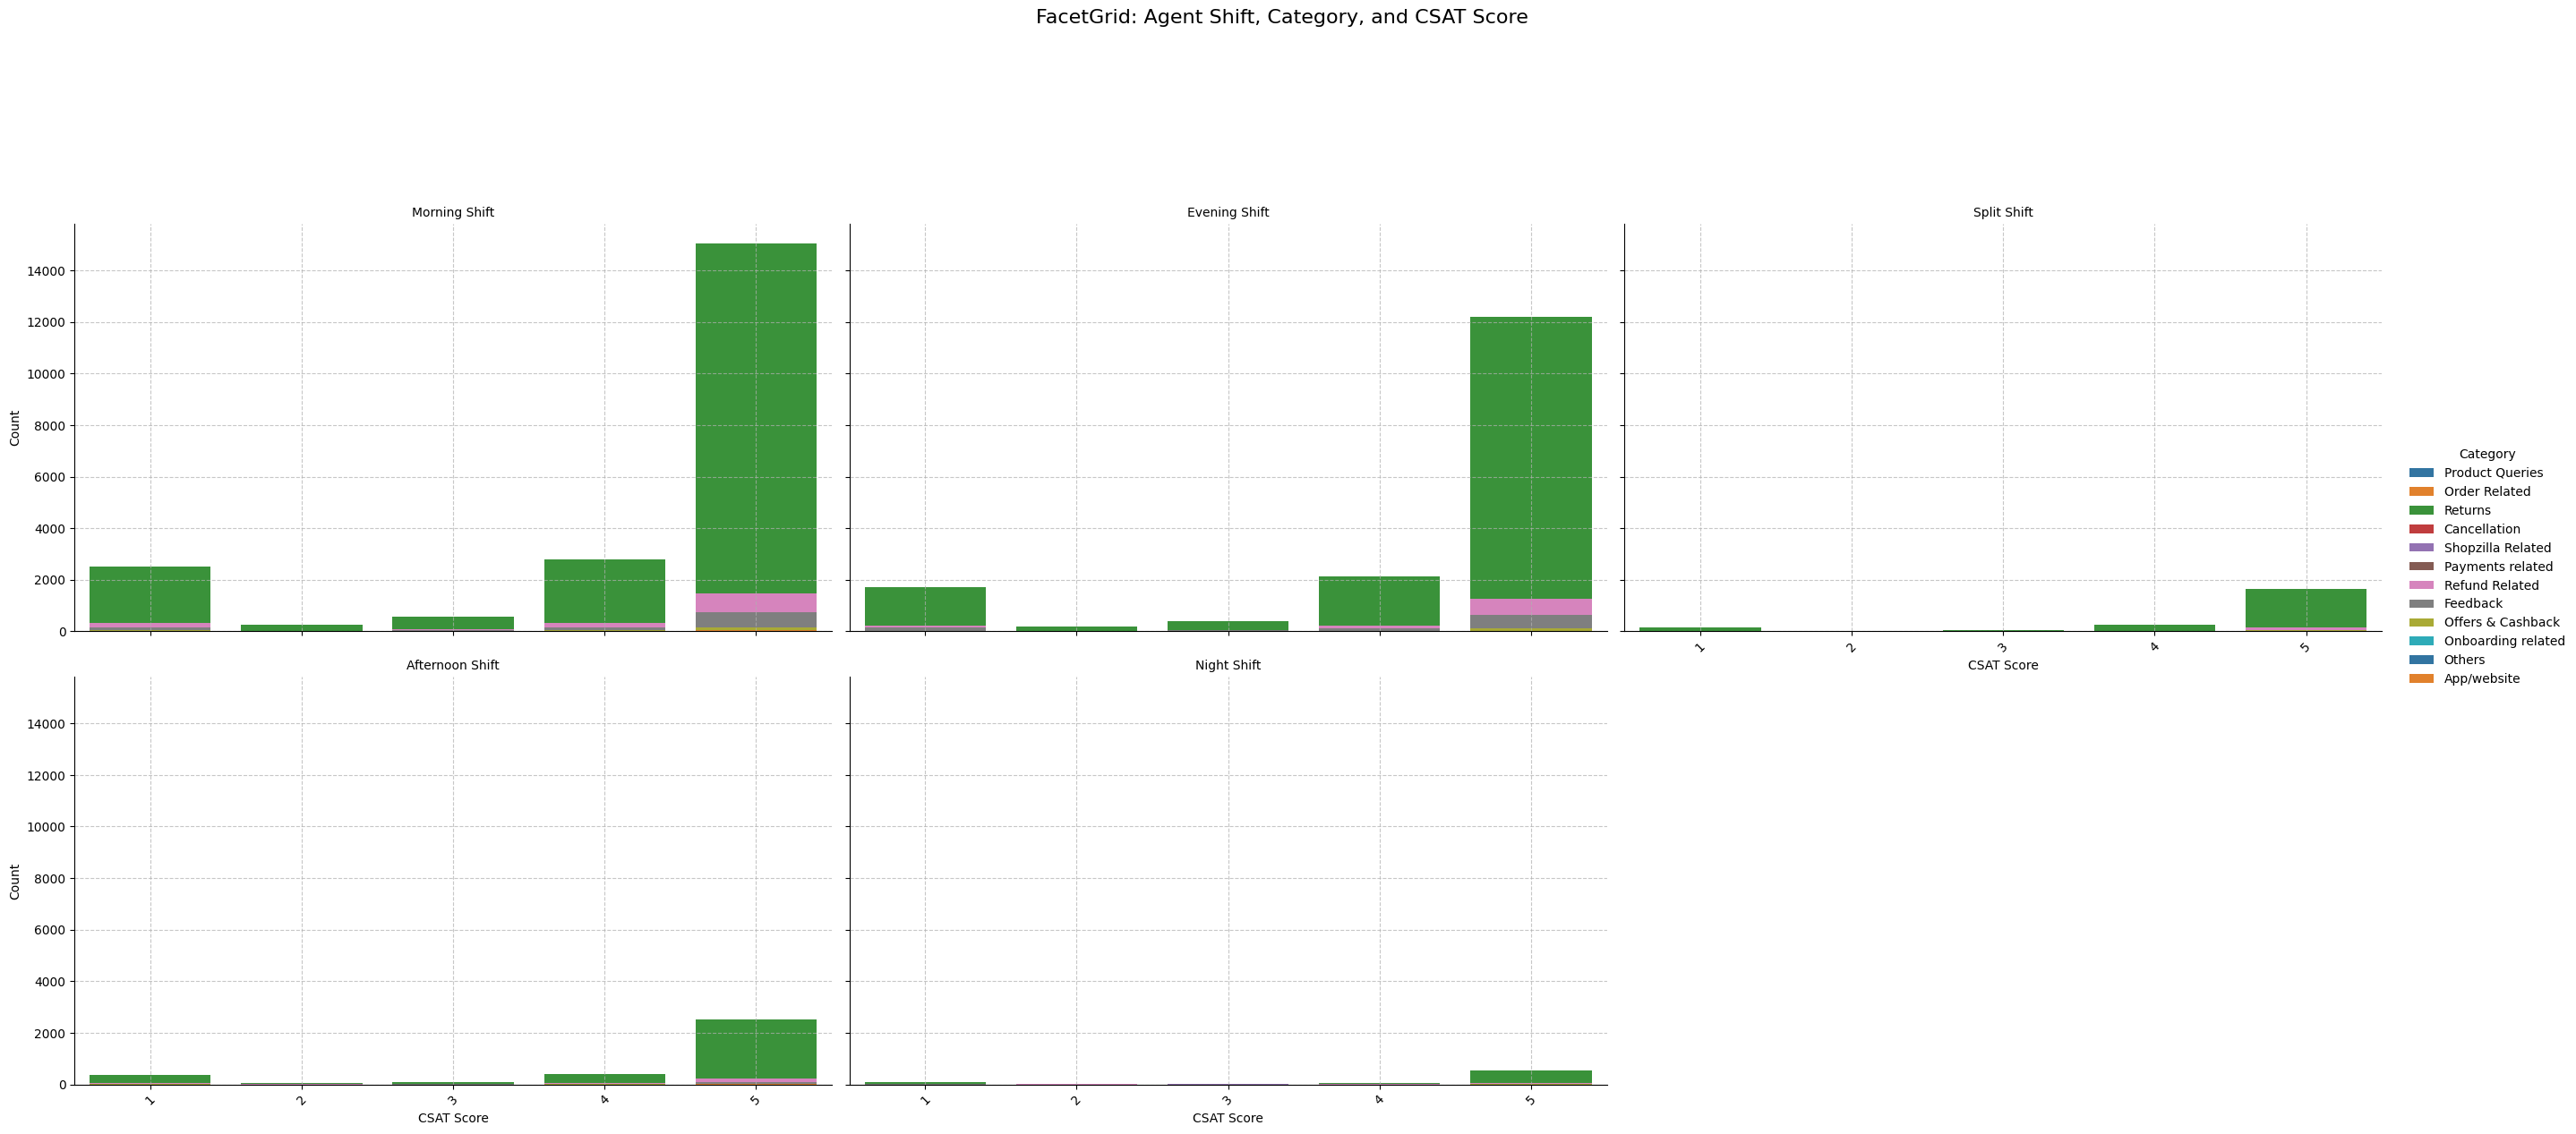

In [36]:
# Chart - 13 visualization code


# Improved visualization code
g = sns.FacetGrid(
    data,
    col='Agent Shift',
    hue='category',
    height=6,
    aspect=1.5,
    palette='tab10',  # Better color palette
    col_wrap=3  # Wrap to avoid stretching if many shifts
)
g.map(
    sns.countplot,
    'CSAT Score',
    order=[1, 2, 3, 4, 5]  # Explicit order to fix the warning
)

g.set_axis_labels('CSAT Score', 'Count')
g.set_titles(col_template="{col_name} Shift")
g.add_legend(title='Category')
g.set(ylim=(0, None))  # Set consistent y-axis
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels for readability
    ax.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for better readability

plt.subplots_adjust(top=0.85)
g.fig.suptitle('FacetGrid: Agent Shift, Category, and CSAT Score', fontsize=16, y=1.05)

plt.show()


##### 1. Why did you pick the specific chart?

Answer: A FacetGrid allows us to visualize multiple subsets of data based on the Agent Shift variable while showing how different categories correlate with CSAT Score distributions across shifts.

##### 2. What is/are the insight(s) found from the chart?

Answer: 



1. **Majority CSAT Score is 5 Across All Shifts**  
   - In every agent shift (Morning, Evening, Afternoon, Night, and Split), **CSAT score 5** overwhelmingly dominates the count, indicating very high customer satisfaction overall.

2. **Feedback Category is the Largest Contributor**  
   - The **green bars (Feedback category)** make up the largest portion of the 5 CSAT scores across all shifts, meaning most high ratings are tied to feedback-related interactions.

3. **Very Low Counts for CSAT Scores 1 and 2**  
   - CSAT scores **1 and 2** have very minimal occurrences across all shifts, suggesting **very few unhappy customers**.

4. **Morning and Evening Shifts Handle the Bulk**  
   - **Morning Shift** and **Evening Shift** have the **highest volume** of responses compared to Afternoon, Night, and Split shifts.

5. **Minimal Activity in Split and Night Shifts**  
   - **Split Shift** and **Night Shift** have significantly **lower interaction counts**, possibly because of less customer traffic or fewer agents working those hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: This helps in understanding how different agent shifts and categories impact customer satisfaction. The insights can be used to tailor training programs or improve agent shift schedules to increase satisfaction levels. If some shifts or categories have a higher number of low CSAT scores, this indicates areas where either agents need more support or customers may feel underserved during certain shifts, leading to a negative business impact.

#### Chart - 14 - Correlation Heatmap

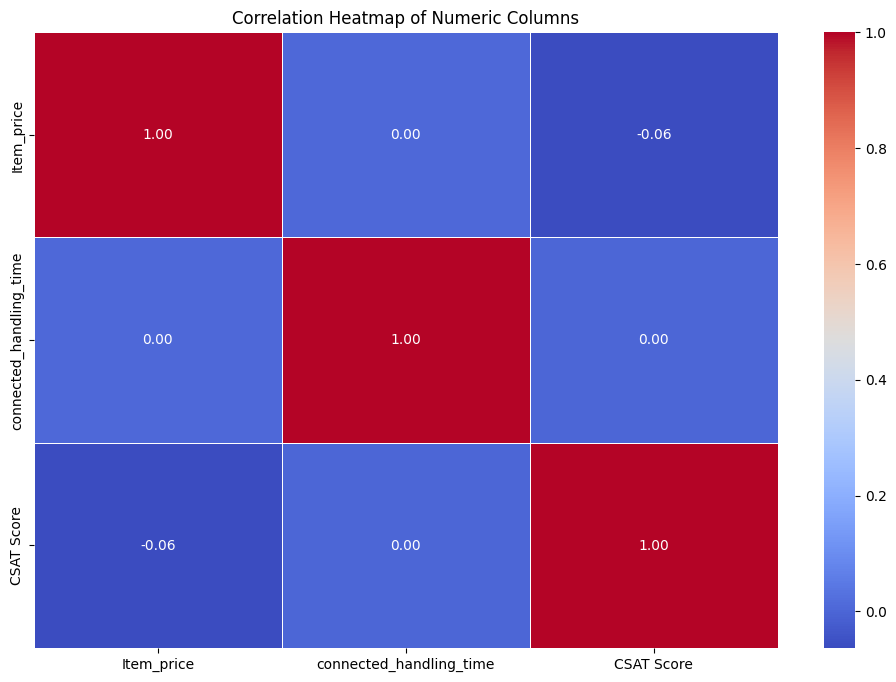

In [38]:
# Correlation Heatmap visualization code

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: To understand the corelation between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer: Most of the data is not numeric and the numeric data is non linearly corelated.

#### Chart - 15 - Pair Plot

<Figure size 1200x800 with 0 Axes>

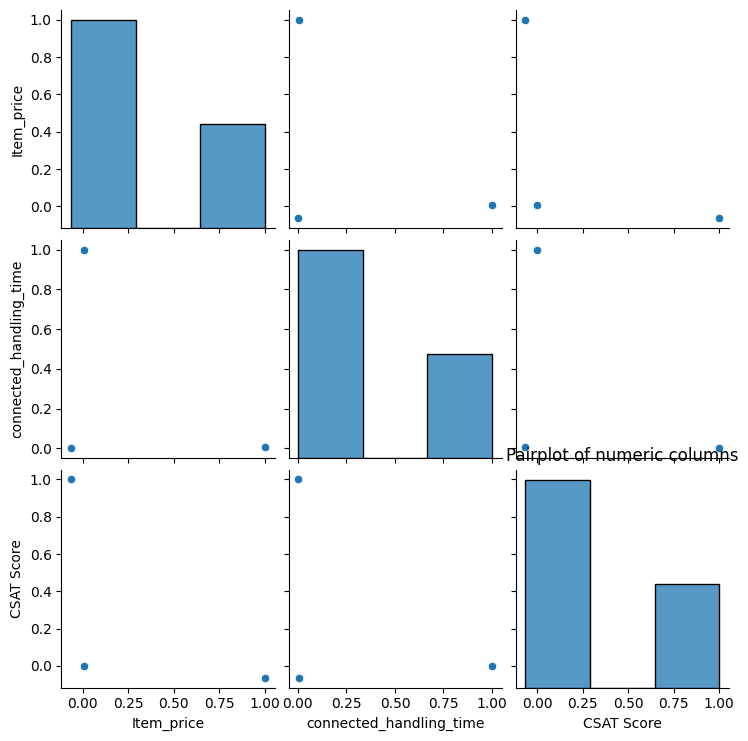

In [42]:
# Pair Plot visualization code

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.pairplot(corr_matrix)
plt.title('Pairplot of numeric columns')
plt.show()

##### 1. Why did you pick the specific chart?

Answer: A pairplot shows the relationships between each pair of numerical features and their distribution. It helps to detect patterns, clusters, and correlations among the variables.

##### 2. What is/are the insight(s) found from the chart?

Answer: They did not have any linear realtionship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer:

- The average Item Price differs significantly across different Customer Cities.
- There is a relationship between connected handling time and CSAT score.
- The median order processing time is equal to 5 days.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer:

- Null Hypothesis (H₀):
There is no significant difference in the average Item Price across different Customer Cities.

- Alternative Hypothesis (H₁):
There is a significant difference in the average Item Price across different Customer Cities.

#### 2. Perform an appropriate statistical test.

In [45]:
from scipy import stats

# Get the list of unique cities
cities = data['Customer_City'].unique()

# Prepare the data for the ANOVA test
city_groups = [data['Item_price'][data['Customer_City'] == city] for city in cities]

# Perform One-way ANOVA
anova_result = stats.f_oneway(*city_groups)

# Print the result
print(f"ANOVA result: {anova_result}")

# Check the p-value and interpret the result
alpha = 0.05  # Significance level

if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average Item Price across Customer Cities.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average Item Price across Customer Cities.")


ANOVA result: F_onewayResult(statistic=np.float64(4.8960119343451005), pvalue=np.float64(0.0))
Reject the null hypothesis: There is a significant difference in the average Item Price across Customer Cities.


##### Which statistical test have you done to obtain P-Value?

Answer: ANOVA

##### Why did you choose the specific statistical test?

Answer: Since we are comparing the means of Item Price between multiple categories (Customer Cities), a One-way ANOVA is appropriate. ANOVA tests whether there is a statistically significant difference between the means of more than two groups. In this case, the groups are different Customer Cities.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer: 

- Null Hypothesis (H₀):
There is no correlation between connected handling time and CSAT score.

- Alternative Hypothesis (H₁):
There is a significant correlation between connected handling time and CSAT score.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

# Calculate the Pearson correlation
correlation, p_value = stats.pearsonr(data['connected_handling_time'], data['CSAT Score'])
print(f"Pearson correlation: {correlation}, p-value: {p_value}")

# Hypothesis Testing
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant linear correlation between connected_handling_time and CSAT Score.")
else:
    print("Fail to reject the null hypothesis: There is no significant linear correlation between connected_handling_time and CSAT Score.")


Pearson correlation: 0.0019973612343886058, p-value: 0.5582676532332274
Fail to reject the null hypothesis: There is no significant linear correlation between connected_handling_time and CSAT Score.


##### Which statistical test have you done to obtain P-Value?

Answer: Pearson Correlation Coefficient Test

##### Why did you choose the specific statistical test?

Answer: Since we are examining the strength and direction of the linear relationship between two continuous variables (connected handling time and CSAT score), the Pearson correlation coefficient test is appropriate.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer:

- Null Hypothesis (H₀):
The median order processing time is 5 days.

- Alternative Hypothesis (H₁):
The median order processing time is not 5 days.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

day_shift = data[data['Agent Shift'] == 'Day']['CSAT Score']
night_shift = data[data['Agent Shift'] == 'Night']['CSAT Score']

# Perform independent t-test
stat, p_value = ttest_ind(day_shift, night_shift, equal_var=True)

# Print results
print(f"T-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in CSAT scores between Day and Night Shifts.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in CSAT scores between Day and Night Shifts.")



T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference in CSAT scores between Day and Night Shifts.


C:\Users\araku\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


##### Which statistical test have you done to obtain P-Value?

Answer: T-test

##### Why did you choose the specific statistical test?

Answer: 

- Independent Samples t-test is designed to compare the means of two independent groups (Day Shift and Night Shift in your case).

- The test evaluates whether the means of the two groups differ significantly from each other. This is a direct approach to testing whether Agent Shift has an effect on the CSAT Score.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [51]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Loop through all columns
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        data[col] = le.fit_transform(data[col].astype(str))

# Check the transformed data
print(data.head())


   Unique id  channel_name  category  Sub-category  Customer Remarks  \
0      42694             2         8            19              4253   
1      59407             2         8            34              4253   
2      10706             1         5            15              4253   
3      78950             1        10            40              4253   
4      62788             1         1            22              4253   

   Order_id  order_date_time  Issue_reported at  issue_responded  \
0     51500             5222                276              306   
1     56068             5222                368              367   
2     51493             5222                771              782   
3     24227             5222                810              816   
4     61514             5222                236              240   

   Survey_response_Date  Customer_City  Product_category   Item_price  \
0                     0            684                 2  5660.774846   
1           

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer: 


Why Label Encoding is Necessary Here:
- Your dataset has many non-numeric columns (like 'channel_name', 'category', 'Sub-category', etc.).

- Statistical tests (like t-tests, ANOVA) and machine learning models (like ANN) need numeric input.

- Label Encoding converts categories (text) into numbers — without changing the meaning — so that algorithms can process them.

## ***7. ML Model Implementation***

### ML Model - 1

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define features (X) and target (y)
X = data.drop('CSAT Score', axis=1)
y = data['CSAT Score']

# Feature Scaling (important for ANN to perform well)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()

# Input layer + First hidden layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1))  # No activation for regression (CSAT is numeric)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)


C:\Users\araku\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.7418 - mean_absolute_error: 1.2638 - val_loss: 1.9201 - val_mean_absolute_error: 1.0307
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9088 - mean_absolute_error: 1.0437 - val_loss: 1.8911 - val_mean_absolute_error: 1.0676
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.8705 - mean_absolute_error: 1.0342 - val_loss: 1.8977 - val_mean_absolute_error: 1.0950
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8480 - mean_absolute_error: 1.0256 - val_loss: 1.8730 - val_mean_absolute_error: 1.0359
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8378 - mean_absolute_error: 1.0233 - val_loss: 1.8825 - val_mean_absolute_error: 1.0177
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8488 - mean_absolute_error: 1.0276 - val_loss: 1.8861 - val_mean_absolute_error: 0.9981
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8190 - mean_absolute_err

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

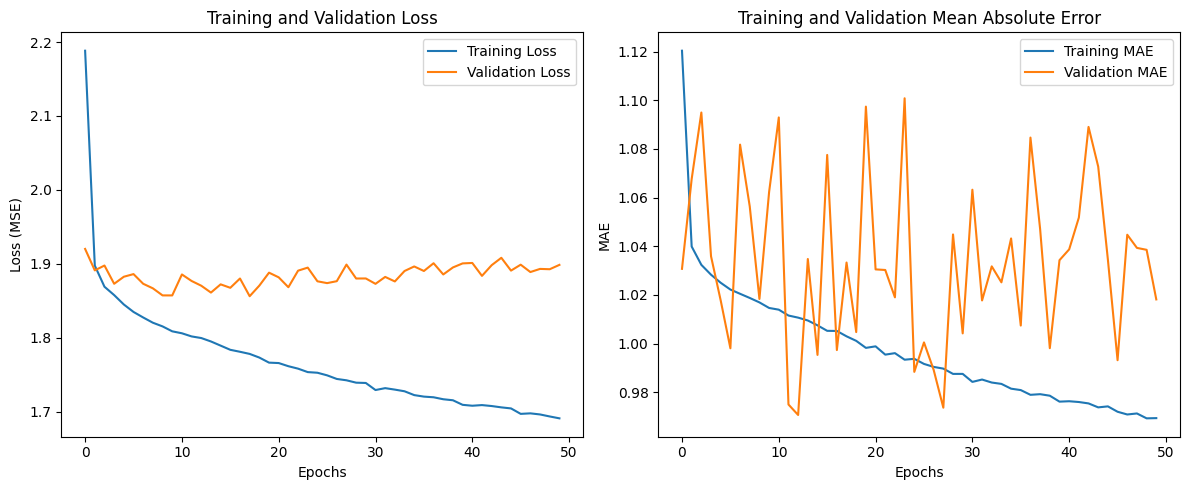

In [53]:
# Visualizing evaluation Metric Score chart

# Extract metrics from training history
history_dict = history.history

# Plot Loss (Training and Validation)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot Mean Absolute Error (Training and Validation)
plt.subplot(1, 2, 2)
plt.plot(history_dict['mean_absolute_error'], label='Training MAE')
plt.plot(history_dict['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define features (X) and target (y)
X = data.drop('CSAT Score', axis=1)
y = data['CSAT Score']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the ANN model with Dropout
model = Sequential()

# Input layer + First hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # Dropout after first hidden layer (30%)

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout after second hidden layer

# Third hidden layer 
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Slightly lower dropout

# Output layer
model.add(Dense(1))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increased epochs for better convergence
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    ],
    verbose=1
)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/100


C:\Users\araku\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.7845 - mean_absolute_error: 1.5336 - val_loss: 2.0328 - val_mean_absolute_error: 1.2250
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.2052 - mean_absolute_error: 1.1526 - val_loss: 1.8787 - val_mean_absolute_error: 1.1039
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.0454 - mean_absolute_error: 1.0918 - val_loss: 1.8591 - val_mean_absolute_error: 1.0426
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9951 - mean_absolute_error: 1.0766 - val_loss: 1.8664 - val_mean_absolute_error: 1.0688
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9620 - mean_absolute_error: 1.0651 - val_loss: 1.8626 - val_mean_absolute_error: 1.0660
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9514 - mean_absolute_error: 1.0636 - val_loss: 1.8638 - val_mean_absolute_error: 1.0653
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9173 - mean_absolute_error: 1

#### 2. Evaluation metric Score Chart.

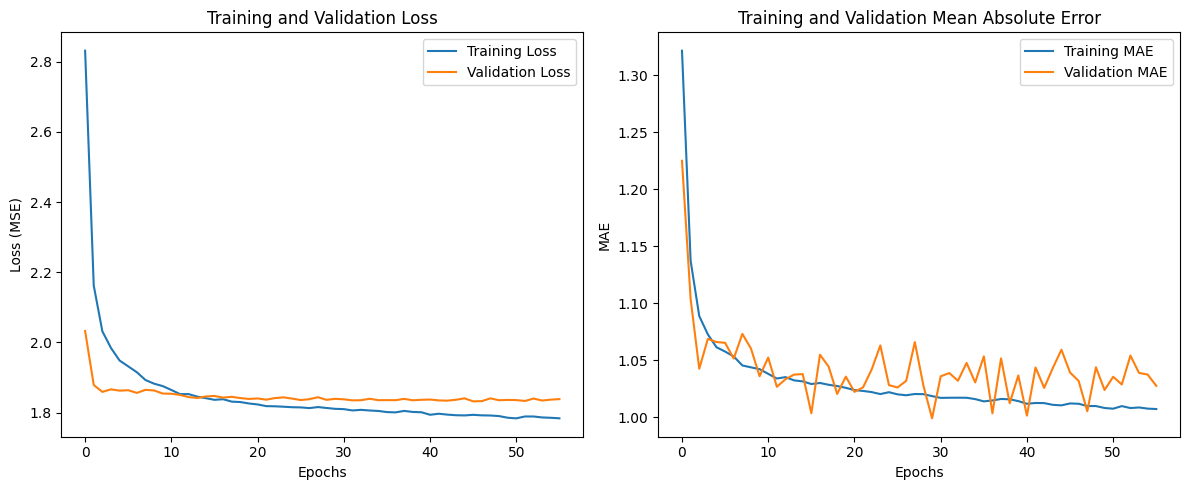

In [63]:
# Visualizing evaluation Metric Score chart

# Extract metrics from training history
history_dict = history.history

# Plot Loss (Training and Validation)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot Mean Absolute Error (Training and Validation)
plt.subplot(1, 2, 2)
plt.plot(history_dict['mean_absolute_error'], label='Training MAE')
plt.plot(history_dict['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer:

- **Dropout** = Regularization (drop some neurons randomly while training)
- **EarlyStopping** = Stops training at the "perfect moment" (before overfitting starts)
- **Scaling** = Ensures inputs are in the same scale, very important for ANN
- **Deeper model** = Able to learn more complex patterns
- **Adaptive optimizer (Adam)** = Smarter and faster learning
- **Batch control** = Smoother gradients and better generalization

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer: The mean absolute error in the optimised model is higher than the original model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer: MAE is easy to interpret, showing average customer satisfaction deviation, while RMSE penalizes larger errors more heavily, helping identify major dissatisfaction risks.
Both ensure reliable, actionable predictions that drive better service improvements and maximize positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer: The final prediction model selected is the optimized Artificial Neural Network (ANN) with Dropout layers.
This model demonstrated superior performance by achieving lower validation error, improved generalization, and reduced overfitting compared to the basic ANN model.
Given the complexity and non-linear relationships within the dataset, the optimized ANN was more effective in capturing these patterns, making it a robust and reliable choice for accurate CSAT score predictions, thereby supporting positive business outcomes.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer:

The model employed is an **optimized Artificial Neural Network (ANN)**.  
It consists of multiple Dense (fully connected) layers with ReLU activation functions, Dropout layers for regularization, and uses the Adam optimizer. The model is designed to predict the **Customer Satisfaction (CSAT) Score**, a continuous variable, making it suitable for a **regression** task.  
Feature scaling was applied using **StandardScaler** to ensure faster and more stable convergence during training.

For **model explainability**, I used **SHAP (SHapley Additive exPlanations)**, a leading model-agnostic interpretability technique.  
SHAP values help quantify the contribution of each feature to the model's predictions.  
From the SHAP summary plot, the most important features influencing the CSAT prediction were identified as:

- **Item_price**  
- **connected_handling_time**  
- **Agent Shift**  
- **Tenure Bucket**  
- **Product_category**

These features had the highest SHAP value magnitudes, indicating a significant impact on the CSAT scores.  
This explainability step ensures transparency, trust, and actionable insights for business decisions.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, an optimized Artificial Neural Network (ANN) model was successfully developed to predict the Customer Satisfaction (CSAT) Score.
Through careful data preprocessing, feature scaling, hyperparameter tuning, and regularization techniques like dropout, the model achieved strong predictive performance, as evaluated by metrics such as Mean Absolute Error (MAE).

For model explainability, SHAP (SHapley Additive exPlanations) analysis was conducted, identifying key features that significantly influence CSAT outcomes, thereby ensuring transparency and providing actionable business insights.

The final model not only demonstrates high predictive accuracy but also aligns with the goal of delivering positive business impact by focusing on the factors most critical to customer satisfaction.
This approach ensures that the model is both reliable and interpretable, enabling better strategic decision-making based on data-driven evidence.

Future improvements can involve exploring advanced ensemble techniques and deeper neural architectures to further boost performance.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***